# Extra Credit Evaluate a Recommender system

In [6]:
import pandas as pd
import numpy as np
rating_data = pd.read_csv("ratings.csv")  
rating_data.head()  

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [3]:
movie = pd.read_csv("links.csv")  
movie.head()  

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
name = pd.read_csv("credits.csv")  
name.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [7]:
# Display the first five movies along with their average rating with movieid
rating_data.groupby('movieId')['rating'].mean().head()

movieId
1    3.888157
2    3.236953
3    3.175550
4    2.875713
5    3.079565
Name: rating, dtype: float64

In [10]:
rating_data.groupby('movieId')['rating'].mean().sort_values(ascending=False).head()

movieId
137078    5.0
134387    5.0
170683    5.0
170633    5.0
132900    5.0
Name: rating, dtype: float64

In [11]:
# The total number of ratings for a movie
rating_data.groupby('movieId')['rating'].count().sort_values(ascending=False).head()

movieId
356     91921
318     91082
296     87901
593     84078
2571    77960
Name: rating, dtype: int64

In [13]:
# Create dataframe and first add the average rating of each movie to this dataframe
ratings_mean_count = pd.DataFrame(rating_data.groupby('movieId')['rating'].mean()) 
# Add the number of ratings for a movie to the dataframe
ratings_mean_count['rating_counts'] = pd.DataFrame(rating_data.groupby('movieId')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
movieId,,
1,3.888157,66008
2,3.236953,26060
3,3.175550,15497
4,2.875713,2981
5,3.079565,15258


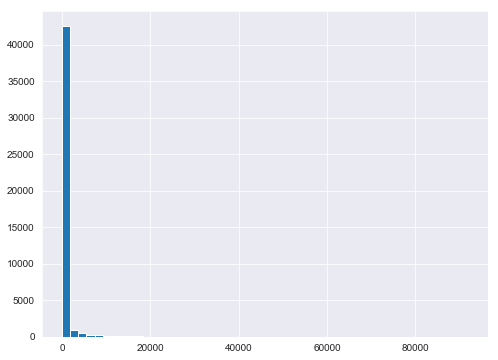

In [19]:
# Plot a histogram for the number of ratings represented by the "rating_counts" column 
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50) 

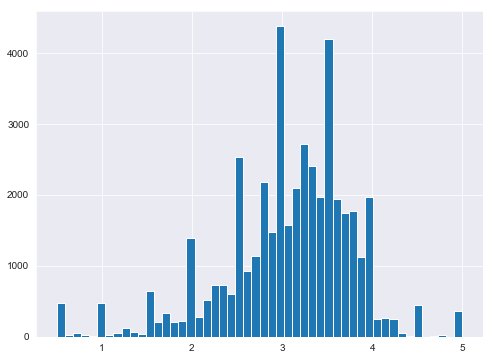

In [20]:
# Plot a histogram for average ratings
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating'].hist(bins=50) 

/Users/liximing/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x432 with 0 Axes>

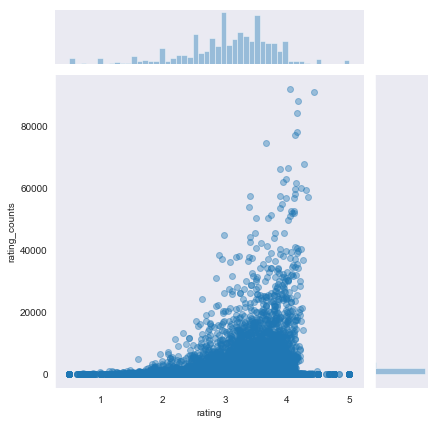

In [21]:
# Plot average ratings against the number of ratings
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  